In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
from datetime import date
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Create a data frame with a range of discount rates
dfi = pd.DataFrame(data=list(range(0,70,1)) , columns=['discount_rate'])

print(dfi.head())
print(dfi.tail())

   discount_rate
0              0
1              1
2              2
3              3
4              4
    discount_rate
65             65
66             66
67             67
68             68
69             69


In [3]:
# Create a function for calculating NPV
def Npv(r):
    return npf.npv(r*0.01, cash_flows)

In [4]:
cash_flows = [-1000, 73.75, 73.75, 73.75, 73.75, 1073.75]
cash_flows

[-1000, 73.75, 73.75, 73.75, 73.75, 1073.75]

In [5]:
#cash_flows = [-1000, 73.75, 73.75, 73.75, 73.75, 1073.75]
cash_flows = [-145, 100, 100, 100, 100, -275]
#cash_flows = [-110, 121]
#cash_flows = [-120000, 30000, 60000, 50000, 40000, 180000]
#cash_flows = [-500, 30,50,-10,20,-5]
#cash_flows = [-500, 600,300,300,200,-1000]
cash_flows

[-145, 100, 100, 100, 100, -275]

In [6]:
print("NPV: ${}".format(round(Npv(15),2)))

NPV: $3.77


In [7]:
dfi['NPV'] = dfi['discount_rate'].apply(Npv)
dfi.set_index('discount_rate', inplace=True)
print(dfi.head())

                     NPV
discount_rate           
0             -20.000000
1             -16.456509
2             -13.303103
3             -10.507575
4              -8.040432


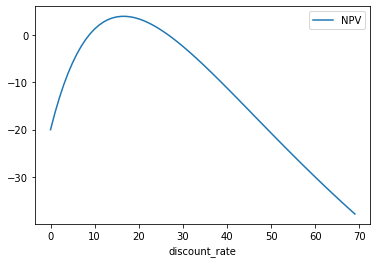

In [8]:
ax = dfi.plot()

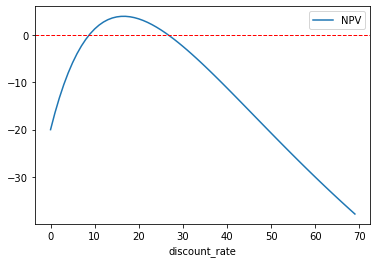

In [9]:
# Same, but with a fancy line at zero
ax = dfi.plot() #dfi.set_index('discount_rate').plot()
ax.axhline(y=0, xmin=dfi.index.min(), xmax=dfi.index.max(), color='r', linestyle='--', lw=1)

In [10]:
# Calculate IRR
irr = round(npf.irr(cash_flows)*100, 5)
irr

8.78283

Based on the IRR formula, IRR is 8.78283 percent


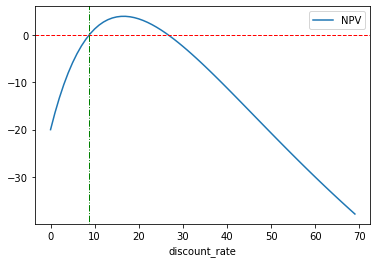

In [11]:
ax = dfi.plot()
ax.axhline(y=0, xmin=dfi.index.min(), xmax=dfi.index.max(), color='r', linestyle='--', lw=1)
ax.axvline(x=irr, ymin=dfi['NPV'].min(),           ymax=dfi['NPV'].max(),           color='g', linestyle='-.', lw=1)
print("Based on the IRR formula, IRR is {} percent".format(irr))

In [12]:
print(dfi.head())
print(dfi.tail())

                     NPV
discount_rate           
0             -20.000000
1             -16.456509
2             -13.303103
3             -10.507575
4              -8.040432
                     NPV
discount_rate           
65            -34.396230
66            -35.255422
67            -36.107014
68            -36.950914
69            -37.787046


In [13]:
print("Based on the data frame, IRR is about {} percent".format(abs(dfi).idxmin()[0]))

Based on the data frame, IRR is about 27 percent
